# Homework 2: Food Safety 
## Cleaning and Exploring Data with Pandas

<img src="scoreCard.jpg" width=400>

In this homework, you will investigate restaurant food safety scores for restaurants in San Francisco. Above is a sample score card for a restaurant. The scores and violation information have been made available by the San Francisco Department of Public Health, and we have made these data available to you via the DS 100 repository. The main goal for this assignment is to understand how restaurants are scored. We will walk through the various steps of exploratory data analysis to do this. To give you a sense of how we think about each discovery we make and what next steps it leads to we will provide comments and insights along the way.

As we clean and explore these data, you will gain practice with:
* Reading simple csv files
* Working with data at different levels of granularity
* Identifying the type of data collected, missing values, anomalies, etc.
* Exploring characteristics and distributions of individual variables

### Question 0

To start the assignment, run the cell below to set up some imports and the automatic tests that we will need for this assignment:

In [72]:
import os
from IPython.display import display, Latex, Markdown
from client.api.notebook import Notebook
ok = Notebook('hw2.ok')

Assignment: Homework 2
OK, version v1.12.10



In many of these assignments (and your future adventures as a data scientist) you will use pandas, numpy, matplotlib.pyplot, and seaborn.  

1. Import each of these libraries `as` their commonly used abbreviations (e.g., `pd`, `np`, `plt`, and `sns`).  
1. Don't forget to use the jupyter notebook "magic" to enable [inline matploblib plots](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib). 
1. Add the line `sns.set()` to make your plots look nicer.

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

Now, run this cell to log into OkPy:

In [74]:
# Sometimes you'll run into an OAuth bug when you run ok.auth(). If so,
# uncomment this line of code and run this cell again.
os.remove(os.path.join(os.path.expanduser('~'), '.config', 'ok', 'auth_refresh'))

ok.auth()


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: cMMqJgTo9VLyYvqdwRnVFXBUbiNEWx
Successfully logged in as dcroce@berkeley.edu


## Loading Food Safety Data

To begin our investigation, we need to understand the structure of the data. Recall this involves answering questions such as 

* Is the data in a standard format or encoding?
* Is the data organized in records?
* What are the fields in each record?

There are 4 files in the data directory.  Use the `ls -lh` command to list all the files and their sizes stored in the data directory.

**Note for Windows users:** Unfortunately, since Windows is not a UNIX system most lines of shell code won't work. You can reference http://simplyadvanced.net/blog/cheat-sheet-for-windows-command-prompt/ for how to translate the code into the Windows command prompt, or you can use http://datahub.berkeley.edu/, or if you're feeling adventurous you can try to [set up Anaconda in Bash environment that Windows has recently started to support](http://www.cgranade.com/blog/2016/08/22/qutip-on-wsl.html).

In [75]:
!ls -lh data

total 9904
-rwxr-xr-x@ 1 dominiccroce  staff   645K Sep  7 12:20 businesses.csv
-rwxr-xr-x@ 1 dominiccroce  staff   493K Sep  7 12:20 inspections.csv
-rwxr-xr-x@ 1 dominiccroce  staff   120B Sep  7 12:20 legend.csv
-rwxr-xr-x@ 1 dominiccroce  staff   3.7M Sep  7 12:20 violations.csv


### Question 1a

From the above output we see that one of the files is relatively small.  Use the `cat` command to cat that file and print what it contains.  

In [76]:
!cat data/legend.csv

### Question 1b

Run the `head` command to verify that the remaining files are also CSV formatted as their file extension suggests

In [77]:
!head data/*

==> data/businesses.csv <==











==> data/inspections.csv <==











==> data/legend.csv <==






==> data/violations.csv <==












Answer the following boolean expressions using (True or False).

In [78]:
# Are all the files CSV files?
all_files_appear_to_be_csv = True

# Do all the files have a header line?
all_files_contain_headers = True

# Do all the strings in the file have quotes around them?
strings_appear_quoted = True


### Question 1c

Run the following command to determine the file encoding of each of these files

In [79]:
!file data/*

data/businesses.csv:  ISO-8859 text, with CRLF line terminators
data/inspections.csv: ASCII text, with CRLF line terminators
data/legend.csv:      ASCII text, with CRLF line terminators
data/violations.csv:  ASCII text, with CRLF line terminators


Based on the above information let's attempt to load the `businesses.csv`, `inspections.csv`, and the `violations.csv` into pandas data frames with the following names `bus`, `ins`, and `vio`.  Because of character encoding issues one of the files will require an additional argument `encoding='ISO-8859-1'` when calling `pd.read_csv`. 

In [80]:
# path to directory containing data
dsDir = "data/"

bus = pd.read_csv(dsDir + "businesses.csv", encoding = "ISO-8859-1")
ins = pd.read_csv(dsDir + "inspections.csv")
vio = pd.read_csv(dsDir + "violations.csv")

Run the following cells in order to view a portion of each dataframe.

In [81]:
bus.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,+14154217044
1,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
2,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
3,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051


In [82]:
ins.head(5)

,business_id,score,date,type
0,10,82,20160503,routine
1,10,94,20140729,routine
2,10,92,20140114,routine
3,19,94,20160513,routine
4,19,94,20141110,routine


In [83]:
vio.head(5)

,business_id,date,description
0,10,20160503,High risk food holding temperature [ date vi...
1,10,20160503,High risk food holding temperature [ date vi...
2,10,20160503,High risk vermin infestation
3,10,20160503,Unapproved or unmaintained equipment or utensils
4,10,20160503,No thermometers or uncalibrated thermometers


### Question 1d

In the following describe at least one potential problem with the above data. Consider issues with missing values and bad data.  

In [84]:
q1d_answer = r"""

In vio, description includes a description but also date violation corrected in some cases. 
The column shouldn't contain two different categories of data sometimes and only one other times 

"""

display(Markdown(q1d_answer))



In vio, description includes a description but also date violation corrected in some cases. 
The column shouldn't contain two different categories of data sometimes and only one other times 



In [85]:
_ = ok.grade('q01')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: dcroce@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/QW8G3Y
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



We will explore each file in turn, including determining its granularity and primary keys and exploring many of the variables indivdually. Let's begin with the businesses file, which has been read into the data.frame `bus`.

## Examining the Business data

From its name alone, we expect the `businesses.csv` file to contain information about the restaurants. Let's investigate the granularity of this dataset.

**Important note: From now on, the local autograder tests will not be comprehensive. You can pass the OkPy tests in your notebook but still fail tests in the autograder.** Please be sure to check your results carefully.

### Question 2

#### Question 2a

Examining the entries in in the `businesses.csv` table `bus` is the `business_id` unique for each record?

In [86]:
len(pd.unique(bus["business_id"])) == len(bus["business_id"])  # use value_counts() or unique() to determine if the business_id field is unique

True

In [87]:
is_business_id_unique = True # put your final answer True/False here

In [88]:
_ = ok.grade('q02a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: dcroce@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/VOVj81
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 2b

With this information, you can address the question of granularity and so answer the questions below.

1. What is the granularity of the businesses data frame? 
1. How many records are there?
1. What does each record represent (e.g., a store, a chain, a transaction)?  
1. What is the primary key?

Please write your answer in the `q2b_answer` variable. You may create new cells to run code as long as you don't delete the cell below.

In [89]:
# use this cell for scratch work
# consider using groupby or value_counts() on the 'name' or 'business_id'
bus.groupby(["name","business_id"]).count()

,,address,city,state,postal_code,latitude,longitude,phone_number
name,business_id,,,,,,,
NORDSTROM CAFE BISTRO,1674,1,1,1,1,1,1,1
100% DESSERT CAFE,37633,1,1,1,1,1,1,1
12 TRIBES KOSHER FOODS,68597,1,1,1,1,1,1,1
1300 ON FILLMORE,34647,1,1,1,1,1,1,1
1428 HAIGHT,79117,1,1,1,1,0,0,1
1601 BAR & KITCHEN,69691,1,1,1,1,0,0,1
1760,75044,1,1,1,0,0,0,1
17TH & NOE MARKET,4474,1,1,1,1,1,1,1
18 REASONS,64717,1,1,1,1,1,1,1


In [90]:
q2b_answer = r"""

1. Each row represents a unique location of a business
2. 6315
3. Each record represents a store location
4. Business id since it is unique for each row

"""

display(Markdown(q2b_answer))



1. Each row represents a unique location of a business
2. 6315
3. Each record represents a store location
4. Business id since it is unique for each row



## Zip code

Next, let's  explore some of the variables in the business table. We begin by examining the postal code.

### Question 3

#### Question 3a


What kind of values are in the variable postal code in the `bus` data frame?  
1. Is zip code quantitative or qualitative? If qualitative, is it ordinal or nominal? 
1. How are the zip code values encoded in python: ints, floats, strings, booleans ...

To answer the second question you might want to examine a particular entry.

In [91]:


# Use this cell for your explorations.
q3a_answer = r"""

1. Zip code is qualitative nominal data
2. Zip code values are strings

"""

display(Markdown(q3a_answer))

bus.loc[:,"postal_code"].apply(type)



1. Zip code is qualitative nominal data
2. Zip code values are strings



0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
5         <class 'str'>
6         <class 'str'>
7         <class 'str'>
8         <class 'str'>
9         <class 'str'>
10        <class 'str'>
11        <class 'str'>
12        <class 'str'>
13        <class 'str'>
14        <class 'str'>
15        <class 'str'>
16        <class 'str'>
17        <class 'str'>
18        <class 'str'>
19        <class 'str'>
20        <class 'str'>
21        <class 'str'>
22        <class 'str'>
23        <class 'str'>
24        <class 'str'>
25        <class 'str'>
26        <class 'str'>
27        <class 'str'>
28        <class 'str'>
29        <class 'str'>
             ...       
6285    <class 'float'>
6286      <class 'str'>
6287      <class 'str'>
6288      <class 'str'>
6289      <class 'str'>
6290      <class 'str'>
6291      <class 'str'>
6292      <class 'str'>
6293      <class 'str'>
6294      <class 'str'>
6295      <class

#### Question 3b

To explore the zip code values, it makes sense to examine counts, i.e., the number of records  that have the same zip code value. This is essentially answering the question: How many restaurants are in each zip code? 

Please generate a dataframe with `postal_code` as the index and a column called `count` which denotes the number of restaurants for each zip code.   If the zipcode is missing be sure to replace it with `MISSING` (e.g., by using `fillna`).

In [92]:
zip_counts = bus.fillna("MISSING").groupby(["postal_code"])["name"].count().to_frame()
zip_counts = zip_counts.rename(columns={'name': 'count'})
zip_counts

,count
postal_code,
00000,1
92672,1
94013,2
94014,2
94066,1
941,1
94101,2
94102,458
94103,558


In [93]:
_ = ok.grade('q03b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: dcroce@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/W690gg
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



We see that there are many missing values for zip code. There is also some bad data where the postal code got screwed up, e.g., there are 3 'Ca' and 3 'CA' values. Additionally, there are some extended postal codes that are 9 digits long, rather than the typical 5 digits.

Let's clean up the extended zip codes by dropping the digits beyond the first 5. It's typically good practice to keep the original values when we are manipulating data and place the modified data in a new column in the DataFrame. We'll call the new column `zip_code`.

In [94]:
# Run me
bus['zip_code'] = bus['postal_code'].str[:5]
bus['zip_code'].value_counts(dropna=False)

94110    586
94103    559
94102    458
94107    451
94133    417
94109    383
94111    282
94122    270
NaN      259
94118    243
94115    238
94114    230
94105    226
94108    224
94117    197
94112    190
94123    169
94124    164
94121    161
94132    134
94104    133
94116     93
94134     74
94127     71
94131     48
94158     17
94130      8
94143      5
Ca         3
CA         3
94129      2
94013      2
94014      2
94101      2
94609      1
95105      1
94066      1
94120      1
94545      1
94188      1
94602      1
94621      1
00000      1
92672      1
941        1
Name: zip_code, dtype: int64

#### Question 3c

We notice that there are still a lot of missing values!  Examine the businesses with missing zipcode values.  Pay attention to their addresses.  Are there any patterns to missing values in zip codes?

**Hint:** You can use `.iloc` to look at different sections of the DataFrame.

In [95]:
# Use this cell for your explorations.
q3c_answer = r"""

The corresponding addresses are either at corners, Off the grid, various locations, or other non-physical
locations. This means this likely a food truck or other mobile business which makes the zip code difficult to determine.

"""

display(Markdown(q3c_answer))

#bus[bus["postal_code"].isnull()]



The corresponding addresses are either at corners, Off the grid, various locations, or other non-physical
locations. This means this likely a food truck or other mobile business which makes the zip code difficult to determine.



#### Question 3d

Often times, we need to get additional information in order to understand whether or not the data are bad values or simply unusual values. With zip codes, we can use the Internet to investigate the zip codes that have only a few businesses. Investigate the restaurants at the following zip codes: *94545*, *94602*, and *94609*.  

Briefly describe why these strange zip codes might be appropriate.  Where are they located and how might they relate to San Francisco?


In [96]:
bus.set_index('zip_code').loc[["94545", "94602", "94609"]]

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
zip_code,,,,,,,,,
94545,5755,J & J VENDING,VARIOUS LOACATIONS (17),San Francisco,CA,94545,NaN,NaN,+14156750910
94602,85459,ORBIT ROOM,1900 MARKET ST,San Francisco,CA,94602,NaN,NaN,+14153705584
94609,65673,DOC'S OF THE BAY,PUBLIC RIGHT OF WAY,San Francisco,CA,94609,37.834628,-122.264171,+14156883245


In [97]:
# Use this cell for your explorations.
q3d_answer = r"""

94545 - this zip corresponds to Alameda county. This is nearby but not in SF. 
Since the address is various locations, it makes sense that the zip code could be slighlty outside of SF.

94602 - this zip corresponds to Oakland. There is a 1900 Market Street in SF as well as in 
Oakland in that zip code.

94609 - this zip corresponds to Oakland. Public right of way means land that is reserved for transit,
so it is likely this is a street vendor. Thus, the zip code being in Oakland makes sense since it is 
near SF but doesn't have to be in SF.

"""

display(Markdown(q3d_answer))



94545 - this zip corresponds to Alameda county. This is nearby but not in SF. 
Since the address is various locations, it makes sense that the zip code could be slighlty outside of SF.

94602 - this zip corresponds to Oakland. There is a 1900 Market Street in SF as well as in 
Oakland in that zip code.

94609 - this zip corresponds to Oakland. Public right of way means land that is reserved for transit,
so it is likely this is a street vendor. Thus, the zip code being in Oakland makes sense since it is 
near SF but doesn't have to be in SF.



#### Question 3e

Often want to clean the data to improve our analysis. This cleaning might include changing values for a variable or dropping records.

Let's correct 94602 to the more likely value based on your analysis.  Let's modify the derived field `zip_code` using `bus['zip_code'].str.replace` to replace 94602 with the correct value.

In [98]:

bus['zip_code'] = bus['zip_code'].str.replace("94602", "94102")

In [99]:
_ = ok.grade('q03e')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: dcroce@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/XD9ljm
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## Latitude and Longitude

Another aspect of the data we want to consider is the prevalence of missing values. If many records have missing values then we might be concerned about whether the nonmissing values are represenative of the population.

### Question 4
 
Consider the longitude and latitude in the business DataFrame. 

#### Question 4a

How many businesses are missing longitude and latitude values?

In [100]:

missing_latlongs = len(bus[bus["longitude"].isnull()].index)

In [101]:
_ = ok.grade('q04a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: dcroce@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/YE9mop
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



Do some zip codes have more than their fair share of missing lat/lon values?

Let's reduce our comparison to just those zips that are in SF and that have many businesses. Below is a list of zip codes.

In [102]:
validZip = ["94102", "94103", "94104", "94105", "94107", "94108",
            "94109", "94110", "94111", "94112", "94114", "94115",
            "94116", "94117", "94118", "94121", "94122", "94123", 
            "94124", "94127", "94131", "94132", "94133", "94134"]

#### Question 4b

For these zip codes find the number of businesses in each zip code and the number without longitude values. Do any zip codes appear to have more than their 'fair share' of missing longitude? To answer this, you will want to compare the proportion of missing values for each zip code.

Create a new dataframe of counts of the null and proportion of null values, storing the result in `bus_sf_latlong`. It should have 3 columns:

1. `zip_code`: Contains the zip codes in the `validZip` variable above.
2. `null_lon`: The number of missing values for the zip code.
3. `not_null_lon`: The proportion of present values for the zip code.

In [103]:

# You might want to filter the bus dataframe to contain only the validZip
bus_sf = bus[bus["zip_code"].isin(validZip)]

# Create a new dataframe of counts of the null and proportion of null values
bus_sf_latlong = pd.DataFrame(columns = ["zip_code", "null_lon", "not_null_lon"])
bus_sf_latlong["zip_code"] = validZip
grouped = bus_sf.groupby(["zip_code"]).count()
bus_sf_latlong["null_lon"] = (grouped["postal_code"] - grouped["latitude"]).values
bus_sf_latlong["not_null_lon"] = (grouped["latitude"] / grouped["postal_code"]).values

bus_sf_latlong

,zip_code,null_lon,not_null_lon
0,94102,197,0.570806
1,94103,253,0.547406
2,94104,59,0.556391
3,94105,100,0.557522
4,94107,247,0.452328
5,94108,82,0.633929
6,94109,146,0.618799
7,94110,251,0.571672
8,94111,115,0.592199
9,94112,59,0.689474


In [104]:
_ = ok.grade('q04b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Backup... 100% complete
Backup successful for user: dcroce@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/Z69nq6
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## Summary of the business data

Before we move on to explore the other data, let's take stock of what we have learned and the implications of our findings on future analysis. 

* We found that the business id is unique across records and so we may be able to use it as a key in joining tables. 
* We also found that there are some bad values in zip code. As a result, we may want to drop the records with zip codes outside of San Francisco or to treat them differently. For some of the bad values, we may want to take the time to look up the restaurant address online and fix these errors.   
* We also found that there are many missing values in latitude and longitude. These may have implications on map making and geographic patterns if the missingness is related to location or restaurant score.

# Investigate the inspection data

Let's now turn to the inspection DataFrame. Earlier, we found that `ins` has 4 columns, these are named `business_id`, `score`, `date` and `type`.  In this section, we determine the granularity of `ins` and investigate the kinds of information provided for the inspections. 

### Question 5

#### Question 5a
As with the business data, assess whether there is one inspection record for each business. 

In [105]:
# The number of rows in ins
rows_in_table = len(ins)

# The number of unique IDs in ins.
unique_ins_ids = len(ins['business_id'].value_counts())

# What does this tell you?
print(rows_in_table)
print(unique_ins_ids)
#Tells us there are more rows than unique ids, meaning business id is not a primary key

15430
5730


In [106]:
_ = ok.grade('q05a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: dcroce@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/1wvNxj
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 5b

Next, we examine the `type` variable. From examining the first few rows of `ins`, we see that `type` is a string and one of the values in the string is 'routine', presumably for a routine inspection. What values does `type` take on? How many occurrences of each value is in the DataFrame? What are the implications for further analysis?

In [107]:
# use this cell for scratch work
# 
ins.groupby("type").count()


,business_id,score,date
type,,,
complaint,1,1,1
routine,15429,15429,15429


In [108]:
q5b_answer = r"""

There are 15429 occurences of routine and 1 occurence of complaint. This means that most of the 
data are rountine inspections, but one of them was due to a complaint. In further analysis we
should take note of this entry and consider it to potentially be an outlier.

"""

display(Markdown(q5b_answer))



There are 15429 occurences of routine and 1 occurence of complaint. This means that most of the 
data are rountine inspections, but one of them was due to a complaint. In further analysis we
should take note of this entry and consider it to potentially be an outlier.



#### Question 5c

Since the data was stored in a .csv file, the dates are formatted as strings such as `20160503`. Once we read in the data, we would like to have dates in an appropriate format for analsysis. Add a new column called `new_date` which formats the `date` into a datetime object. Then add a column called `year` with only the year.

*Hint: You'll want to use the `pd.datetime` functionality at some point.*

In [109]:
ins['new_date'] = pd.to_datetime(ins["date"], format = '%Y%m%d')
ins['year']     = pd.to_datetime(ins["date"], format = '%Y%m%d').dt.year
ins

,business_id,score,date,type,new_date,year
0,10,82,20160503,routine,2016-05-03,2016
1,10,94,20140729,routine,2014-07-29,2014
2,10,92,20140114,routine,2014-01-14,2014
3,19,94,20160513,routine,2016-05-13,2016
4,19,94,20141110,routine,2014-11-10,2014
5,19,94,20140214,routine,2014-02-14,2014
6,24,98,20161005,routine,2016-10-05,2016
7,24,96,20160311,routine,2016-03-11,2016
8,24,96,20141124,routine,2014-11-24,2014
9,24,96,20140612,routine,2014-06-12,2014


In [110]:
_ = ok.grade('q05c')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Backup... 100% complete
Backup successful for user: dcroce@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/5yz4JR
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 5d

What range of years is covered in this data set? Are there roughly same number of inspections each year?

In [111]:
q5d_answer = r"""

Years are covered at 2013 to 2016. The number of inspections each year varies widely.

"""

display(Markdown(q5d_answer))

ins.groupby(["year"]).count()



Years are covered at 2013 to 2016. The number of inspections each year varies widely.



,business_id,score,date,type,new_date
year,,,,,
2013,38,38,38,38,38
2014,5629,5629,5629,5629,5629
2015,3923,3923,3923,3923,3923
2016,5840,5840,5840,5840,5840


Let's examine only the inspections for one year, 2016. This puts businesses on a more equal footing because [inspection guidelines](https://www.sfdph.org/dph/eh/Food/Inspections.asp) generally refer to how many inspections should occur in a given year.

In [112]:
ins2016 = ins[ins['year']==2016]

## Explore inspection score

### Question 6

#### Question 6a
What does the distribution of inspection score for 2016 look like? The inspection scores appear to be integer values. The discreteness of this variable means that we can use a barplot to visualize the distribution of the inspection score. Find the counts of the number of inspections in 2016 for each score. Then, make a bar plot of these counts.

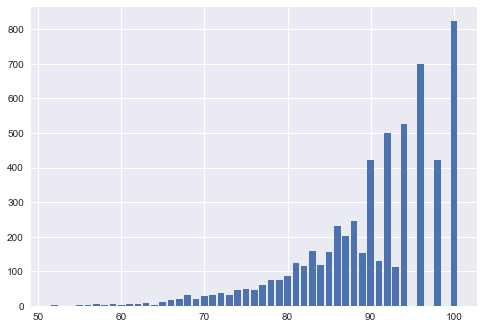

In [113]:
scoreCts = ins2016.groupby(["score"])["date"].count().reset_index()

plt.bar(scoreCts["score"],scoreCts["date"])
plt.show()


#### Question 6b

Describe the qualities of the distribution of the inspections scores. Consider the mode(s), symmetry, tails, gaps, and anamolous values. Are there any unusual features of this distribution? What do your observation imply about the scores?

In [114]:
q6b_answer = r"""

The mode is 100. There is no symetery but in general there are a lot
of values near 100 and it tails off as it approaches 52 (the min). There are gaps in the 90s
(99,97,and 95) which implies there is no way to score certain values perhaps due to rubric not
having small odd values. This implies that the scores are ordinal since the scale of scores is
not linear (ie difference between 100 and 96 is not equivalent to that of 70 and 66 based on
the distribution.)

"""

display(Markdown(q6b_answer))



The mode is 100. There is no symetery but in general there are a lot
of values near 100 and it tails off as it approaches 52 (the min). There are gaps in the 90s
(99,97,and 95) which implies there is no way to score certain values perhaps due to rubric not
having small odd values. This implies that the scores are ordinal since the scale of scores is
not linear (ie difference between 100 and 96 is not equivalent to that of 70 and 66 based on
the distribution.)



#### Question 6c

In assessing the granularity, we want to determine if there is one inspection per business per year. How many restaurants had two inspections? Three or more inspections? Create a dict mapping the number of inspections to the number of business ids with that many inspections.

*Hint: pandas Series have a to_dict() method.*

In [115]:
# .pivot_table(
#     index = "score",
#     columns = "numbers_of_businesses",
#     values = "business_id",
#     aggfunc = sum)

numIns2numIDs = ins2016.groupby(["business_id"]).count().groupby(["score"]).count()["date"].to_dict()


In [116]:
_ = ok.grade('q06c')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: dcroce@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/73B0NA
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



### Restaurants with multiple inspections

### Question 7

Some restaurants had 3 inspections in a calandar year, but not very many did. To examine the distribution of score among restaurants with two scores, we can look at the change in score from the first inspection.

#### Question 7a

What's the relationship between the first and second scores for the businesses with 2 inspections in a year? Do they typically improve?

First, make a dataframe called, `scores_pairs_by_business`, indexed by business_id (containing only business with exactly 2 inspections in 2016).  This dataframe contains the field `score_pair` consisting of the score pairs ordered chronologically  `[first_score, second_score]`. 

Plot these scores. That is, make a scatter plot to display these pairs of scores. Include on the plot a reference line with slope 1. 

You may find the functions `sort_values`, `groupby`, `filter` and `agg` helpful, though not all necessary. 

The first few rows resulting table should look something like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>score_pair</th>
    </tr>
    <tr>
      <th>business_id</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>24</th>
      <td>[96, 98]</td>
    </tr>
    <tr>
      <th>45</th>
      <td>[78, 84]</td>
    </tr>
    <tr>
      <th>66</th>
      <td>[98, 100]</td>
    </tr>
    <tr>
      <th>67</th>
      <td>[87, 94]</td>
    </tr>
    <tr>
      <th>76</th>
      <td>[100, 98]</td>
    </tr>
  </tbody>
</table>

In [117]:
group1 = ins2016.groupby(["business_id"]).count()
group2 = group1[group1["date"] == 2].reset_index()
group3 = ins2016[ins2016["business_id"].isin(group2["business_id"])].sort_values(by = "new_date")
group4 = group3.groupby("business_id").agg(lambda x: list(x))
# #d = {'col1': ts1, 'col2': ts2}
# #pd.DataFrame()
# l = len(group4)
# first_score = group4.iloc[::2]["score"]
# second_score = group4.reset_index().drop([0], axis = 0).set_index("business_id").iloc[::2]["score"]
# #d = {"first_score", first_score.values, "second_score", second_score.values}
# final = pd.concat([first_score, second_score], axis=1).rename(columns = {"score": "first"}).dropna()
# final.columns.values[1] = 'second'
# final
group4 = group4["score"].to_frame().rename(columns = {"score": "score_pair"})

scores_pairs_by_business = group4
scores_pairs_by_business.head()

,score_pair
business_id,
24,"[96, 98]"
45,"[78, 84]"
66,"[98, 100]"
67,"[87, 94]"
76,"[100, 98]"


In [118]:
_ = ok.grade('q07a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: dcroce@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/9rENR3
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



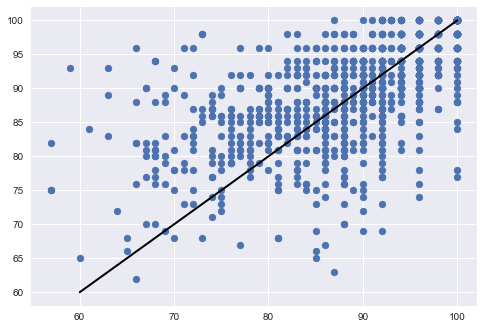

In [119]:
# Create scatter plot here.
x1 = [x[0] for x in scores_pairs_by_business["score_pair"]]
y1 = [x[1] for x in scores_pairs_by_business["score_pair"]]
plt.scatter(x = x1, y = y1)
plt.plot([60, 100], [60, 100], color='k', linestyle='-', linewidth=2)



#### Question 7b

Another way to compare the scores from the two inspections is to examine the difference in scores. Subtract the first score from the second in `scores_pairs_by_business`. Make a histogram of these differences in the scores. We might expect these differences to be positive, indicating an improvement from the first to the second inspection.

(array([   1.,    4.,    3.,    7.,    3.,    9.,   14.,   16.,   29.,
          59.,   89.,  138.,  229.,  153.,  119.,   79.,   54.,   39.,
          29.,   19.,   11.,    4.,    7.,    1.,    5.,    7.,    0.]),
 array([-25, -23, -21, -19, -17, -15, -13, -11,  -9,  -7,  -5,  -3,  -1,
          1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
         27,  29]),
 <a list of 27 Patch objects>)

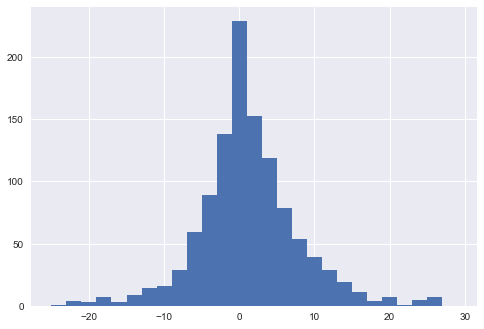

In [120]:
# Create histogram here.
new_scores = [x[1] - x[0] for x in scores_pairs_by_business["score_pair"]]
plt.hist(new_scores, bins = np.arange(-25,30,2))

#### Question 7c

If a restaurant's score improves from the first to the second inspection, what do you expect to see in the scatter plot that you made in 7a? What do you see?

If a restaurant's score improves from the first to the second inspection, how would this be reflected in the histogram of the difference in the scores that you made in 7b? What do you see?

In [121]:
q7c_answer = r"""

If a restaurant's score improves, the point corresponding to that restruarant would be above
the line of slope 1. Not all restaurants improved, so many fall on both sides of the line in
the scatter plot.
If a restaurant's score improved, the restaurant would fall in a bin above 0 on the histogram.
The histogram has a (mostly) normal distribution centered at zero meaning a similar number of
restaurants lowered their scores as improved them. If most restaurants improved you'd expect to
see a right skew distribution.

"""

display(Markdown(q7c_answer))



If a restaurant's score improves, the point corresponding to that restruarant would be above
the line of slope 1. Not all restaurants improved, so many fall on both sides of the line in
the scatter plot.
If a restaurant's score improved, the restaurant would fall in a bin above 0 on the histogram.
The histogram has a (mostly) normal distribution centered at zero meaning a similar number of
restaurants lowered their scores as improved them. If most restaurants improved you'd expect to
see a right skew distribution.



## Summary of the inspections data

What we have learned about the inspections data? What might be some next steps in our investigation? 

* We found that the records are at the inspection level and that we have inspections for multiple years.   
* We also found that may restaurants have more than one inspection a year. In the future, we may want to roll some of the information about the inspections up to the business/restaurant level and join the inspection information with the business dataframe. For example, we could make maps of inspection scores for restaurants.
* We also examined the relationship between the scores when a restaurant has multiple inspections in a year. Our findings were a bit counterintuitive and we warrant further investigation. It also makes sense to learn more about the inspection process to help us understand the connections between scores from multiple inspections. 


# Violations Data

Lastly, we will explore the `vio` data set. As with the first two DataFreames, we want to determine the granularity of the data, the number of records and fields, and we want to investigate the fields (variables). 

### Question 8

#### Question 8a

How many records are in `vio`? What does this tell you about the granularity of `vio` in comparison to `bus` and `ins`? 

In [122]:
q8a_answer = r"""

There are 40936 records in vio. Compared to bus and ins, this means vio has more fine
granularity since it has significantly more records.

"""
display(Markdown(q8a_answer))
print(len(vio))
print(len(bus))
print(len(ins))



There are 40936 records in vio. Compared to bus and ins, this means vio has more fine
granularity since it has significantly more records.



40936
6315
15430


Let's examine the first few rows of `vio` to see if that provides addtional information about the granularity.

In [123]:
vio.head(10)

,business_id,date,description
0,10,20160503,High risk food holding temperature [ date vi...
1,10,20160503,High risk food holding temperature [ date vi...
2,10,20160503,High risk vermin infestation
3,10,20160503,Unapproved or unmaintained equipment or utensils
4,10,20160503,No thermometers or uncalibrated thermometers
5,10,20140729,Insufficient hot water or running water [ dat...
6,10,20140729,Unapproved or unmaintained equipment or utensi...
7,10,20140114,Improper storage of equipment utensils or line...
8,10,20140114,Unclean or degraded floors walls or ceilings ...
9,10,20140114,Inadequate and inaccessible handwashing facili...


Just looking at the first few records in `vio` we see that each inspection has multiple entries. Reading the descriptions, we see that if corrected, a date is listed in the description within square brackets. This date appears to be the same date as the inspection.
We will consider how to derive features from the `description` field when we cover the topic of regular expressions.

#### Question 8b

As with the inspections data frame, let's examine only records for 2016. 
Recall that the dates in the `ins` file are formatted as strings such as 20160503. As before, convert these dates into a datetime object called `new_date`, and create a new colum called `year` that contains the year only. 

In [124]:
vio['new_date'] = pd.to_datetime(vio["date"], format = '%Y%m%d')
vio['year'] = pd.to_datetime(vio["date"], format = '%Y%m%d').dt.year
vio2016 = vio[vio['year'] == 2016]


In [125]:
_ = ok.grade('q08b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: dcroce@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/0Rr7vX
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## Number of violations

When we explore data, we often create new variables that we think might be useful in our analysis. For example, a variable that contains the number of violation records per inspection may be of interest. We might want to see if the number of inspections is correlated with the inspection score.  Or, we might be interested in whether the score improves on the second inspection. 

#### Question 8c
Derive a variable, `num_vio`, that contains the number of violations in a restaurant inspection.

In [126]:
tomerge = vio2016.groupby(["business_id","new_date"]).count()["date"].to_frame().reset_index()
tomerge = tomerge.rename(columns = {"date" : "num_vio"})
ins2016 = pd.merge(ins2016, tomerge)


In [127]:
ins2016.head()

,business_id,score,date,type,new_date,year,num_vio
0,10,82,20160503,routine,2016-05-03,2016,5
1,19,94,20160513,routine,2016-05-13,2016,3
2,24,98,20161005,routine,2016-10-05,2016,1
3,24,96,20160311,routine,2016-03-11,2016,2
4,31,84,20160816,routine,2016-08-16,2016,6


In [128]:
_ = ok.grade('q08c')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: dcroce@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/gJ9E16
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 8d

Now that we have created this new varable, let's examine its distribution. 
Make a histogram of `num_vio` and describe its shape.

(array([  0.00000000e+00,   1.77764326e-01,   2.25585149e-01,
          1.93704600e-01,   1.65456013e-01,   1.01493140e-01,
          6.19451170e-02,   3.65213882e-02,   2.17917676e-02,
          7.86924939e-03,   4.43906376e-03,   2.62308313e-03,
          4.03551251e-04,   2.01775626e-04,   2.01775626e-04]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Patch objects>)

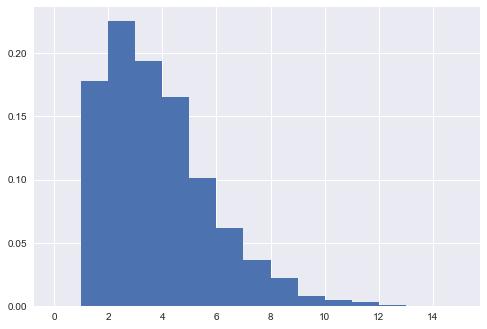

In [129]:
plt.hist(ins2016['num_vio'].values, bins = np.arange(0,16), normed = True)

In [130]:
q8d_answer = r"""

The histogram is right skew with a long tail to the right. The mode is 2. This
means most inspections have a few number of violations.

"""

display(Markdown(q8d_answer))




The histogram is right skew with a long tail to the right. The mode is 2. This
means most inspections have a few number of violations.



## Summary of the violations data

Let's take stock of what we have learned about the violations data and what might be the next steps in our investigation. 

* We found that the records consist of the violations that were found on an inspection. And from inspection it seems that if a violation is corrected this information is provided in the description field.
* We also found that the distribution of the number of violations shows that some restaurants had many violations. 
* In the future, we might want to investigate the relationship between the inspection score and the number of violations. Additionally, it migth be interesting to pursue possible connections between the type of violation and the score


## Submission

Congrats! You are finished with HW2. For convenience, we've included a cell below that runs all the OkPy tests.

In [131]:
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("ok_tests") if q.startswith('q')]

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t

Now, run the cell below to submit your assignment to OkPy. The autograder should email you shortly with your autograded score. The autograder will only run once every 30 minutes.

**If you're failing tests on the autograder but pass them locally**, you should simulate the autograder by doing the following:

1. In the top menu, click Kernel -> Restart and Run all.
2. Run the cell above to run each OkPy test.

**You must make sure that you pass all the tests when running steps 1 and 2 in order.** If you are still failing autograder tests, you should double check your results.

In [132]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Submit... 100% complete
Submission successful for user: dcroce@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/submissions/jR9K75
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



Also, as of this writing there's a bug in OkPy where it will say:

```
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit
```

when running the cell above. Don't worry about that; if you can visit OkPy and see your submission, you've submitted the assignment.

Even if you forget to run the cell above, we'll automatically take your latest backup when grading so don't worry about that.